## **Nama : Vidyana Yulianingrum**
## **NIM : 162112133002**
## **Praktikum : BAB 4 – TEXT MINING**

# **1. Lakukan seluruh percobaan pada modul ini dan berikan analisis yang kalian temukan**

In [ ]:
!pip install Sastrawi
import nltk
import textblob
import Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.1 MB/s eta 0:00:00


Melakukan install library Sastrawi untuk teks bahasa Indonesia, dan import 3 library yang akan digunakan dalam praktikum.

## **a. NLTK**

In [ ]:
import nltk
nltk.download('punkt')

text = "In Brazil they drive on the right-hand side of the road. Brazil has a large coastline on the eastern side of South America"
from nltk.tokenize import word_tokenize
token = word_tokenize(text)
token

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['In',
 'Brazil',
 'they',
 'drive',
 'on',
 'the',
 'right-hand',
 'side',
 'of',
 'the',
 'road',
 '.',
 'Brazil',
 'has',
 'a',
 'large',
 'coastline',
 'on',
 'the',
 'eastern',
 'side',
 'of',
 'South',
 'America']

Melakukan tokenisasi menggunakan library nltk (word_tokenize), dan terlihat output berupa kata (token) yang ada di setiap kalimat. Pada nltk, tanda baca dianggap sebagai salah satu token dan tidak dihapus.

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist

FreqDist({'the': 3, 'Brazil': 2, 'on': 2, 'side': 2, 'of': 2, 'In': 1, 'they': 1, 'drive': 1, 'right-hand': 1, 'road': 1, ...})

Fungsi FreqDist yang tersedia dalam nltk.probability digunakan untuk menghitung frekuensi setiap kata atau token dalam teks.

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist1 = fdist.most_common(10)

.most_common adalah salah satu fungsi untuk menampilkan kata dengan frekuensi terbanyak dan dapat dimunculkan jumlahnya sesuai dengan parameter yang dimasukkan.

<Axes: xlabel='Key'>

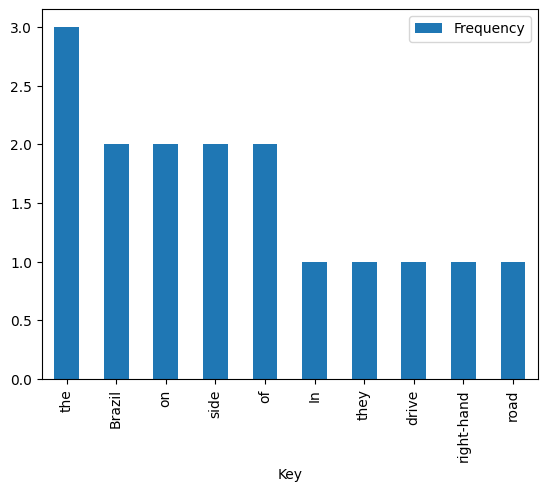

In [ ]:
import pandas as pd
df_freq_tokens = pd.DataFrame.from_dict(dict(fdist1), orient = 'index')
df_freq_tokens.columns = ['Frequency']
df_freq_tokens.index.name = 'Key'
df_freq_tokens.plot(kind = 'bar')

Kata dengan frekuensi terbanyak juga dapat dilihat dengan menggunakan barplot. Terlihat bahwa kata the sangat sering muncul dengan frekuensi kemunculan 3 kali.

In [ ]:
nltk.download('stopwords')
from nltk import word_tokenize
from nltk.corpus import stopwords
a = set(stopwords.words('english'))
text = "Cristiano Ronaldo was born on February 5, 1985, in Funchal, Madeira, Portugas."

tokenizer = nltk.RegexpTokenizer(r"\w+")
text1 = tokenizer.tokenize(text.lower())
print(text1)
stopwords = [x for x in text1 if x not in a]
print(stopwords)

['cristiano', 'ronaldo', 'was', 'born', 'on', 'february', '5', '1985', 'in', 'funchal', 'madeira', 'portugas']
['cristiano', 'ronaldo', 'born', 'february', '5', '1985', 'funchal', 'madeira', 'portugas']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Stopwords digunakan untuk menghapus kata penghubung yang tidak diperlukan dalam analisis text mining. Dalam library nltk, stopwords dapat dilakukan dengan fungsi stopwords yang di import dari nltk.corpus. Selain itu perlu dilakukan set terlebih dahulu untuk memastikan bahwa stopwords yang digunakan adalah dalam bahasa Inggris.

In [ ]:
#Contoh Stemming di NLTK
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

S = 'presumably I would like to MultiPly my provision, saying tHat without crYing'
print('Sentence: ', S)

stemmer_list = [LancasterStemmer, PorterStemmer, SnowballStemmer]
names = ['Lancaster', 'Porter', 'SnowBall']
for stemmer_name, stem in zip(names, stemmer_list):
  if stemmer_name == 'SnowBall':
    st = stem('english')
  else:
    st = stem()
  print(stemmer_name, ':', ' '.join(st.stem(s)for s in S.split()))

Sentence:  presumably I would like to MultiPly my provision, saying tHat without crYing
Lancaster : presum i would lik to multiply my provision, say that without cry
Porter : presum i would like to multipli my provision, say that without cri
SnowBall : presum i would like to multipli my provision, say that without cri


Stemmer dilakukan untuk menghilangkan imbuhan dalam kata. Terdapat 3 algoritma stemmer dalam nltk yang digunakan dalam code di atas, yaitu Lancaster, Porter, dan SnowBall. Jika dilihat outputnya, terdapat perbedaan hasil stemming dari ketiga algoritma, namun Porter Stemmer menghasilkan hasil yang paling mendekati bentuk kata dasar yang benar dalam bahasa Inggris. Akan tetapi tidak dapat dikatakan sudah benar, tidak ada stemmer yang sempurna dan hasilnya tidak selalu 100% akurat.

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

print('rocks :', lemmatizer.lemmatize('rocks'))
print('corpora :', lemmatizer.lemmatize('corpora'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


rocks : rock
corpora : corpus


Selain stemmer, terdapat lemmatizer untuk mengubah kata yang berimbuhan menjadi kata dasar asli. Terlihat bahwa hasil lemmatizer tidak hanya menghapus imbuhan, namun dapat mengembalikan ke kata dasar (corpora menjadi corpus bukan corpo), sehingga lemmatizer sedikit lebih bagus dibandingkan stemmer untuk mengembalikan kata ke bentuk dasarnya.

In [ ]:
#Contoh POS tags dengan NLTK (bahasa inggris)
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
S = 'I am currently learning NLP in English, but if possible I want to know NLP in Indonesian language too'

tokens = word_tokenize(S)
print(pos_tag(tokens))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('I', 'PRP'), ('am', 'VBP'), ('currently', 'RB'), ('learning', 'VBG'), ('NLP', 'NNP'), ('in', 'IN'), ('English', 'NNP'), (',', ','), ('but', 'CC'), ('if', 'IN'), ('possible', 'JJ'), ('I', 'PRP'), ('want', 'VBP'), ('to', 'TO'), ('know', 'VB'), ('NLP', 'NNP'), ('in', 'IN'), ('Indonesian', 'JJ'), ('language', 'NN'), ('too', 'RB')]


Pos tagging dalam nltk dilakukan dengan menggunakan fungsi pos_tag. Sebelum dilakukan pos tagging, teks juga perlu untuk ditokenisasi terlebih dahulu. Pos tagging ini berfungsi untuk mengidentifikasi jenis kata (part-of-speech) dari setiap kata dalam teks atau kalimat. Sebagai contoh ("I", "PRP") yang berarti bahwa I adalah kata ganti orang pertama tunggal dalam bahasa Inggris dan diberi label PRP (Pronoun, Personal).

## **b. TextBlob**

In [ ]:
import textblob
#Contoh tokenisasi dengan TextBlob
from textblob import TextBlob

T = "Hello. Mr. Man. He smiled!! This, i.e. that, is it."
sentence_tokens = TextBlob(T).sentences

#Tokenisasi kata
print(TextBlob(T).words)

#Tokenisasi kalimat
print([str(sent) for sent in sentence_tokens])

['Hello', 'Mr', 'Man', 'He', 'smiled', 'This', 'i.e', 'that', 'is', 'it']
['Hello.', 'Mr. Man.', 'He smiled!!', 'This, i.e.', 'that, is it.']


Dalam TextBlob, tokenisasi dapat dilakukan berdasarkan kata dan kalimat. Untuk tokenisasi kalimat menggunakan fungsi TextBlob(teks).sentences. Sedangkan tokenisasi kata dilakukan dengan menggunakan TextBlob(teks).words. Pada tokenisasi dengan kata, tanda baca dihilangkan dari kata, sedangkan tokenisasi kalimat, tanda baca tidak dihilangkan dan masuk ke dalam kalimat.

In [ ]:
#Contoh TextBlob Stemming & Lemmatizer
from textblob import Word
#Stemming
print("Stem: ", Word('running').stem())

#Lemmatizer
print("Lemmatize: ", Word('went').lemmatize('v'))

Stem:  run
Lemmatize:  go


Stemming dan Lemmatizing pada TextBlob dilakukan dengan menggunakan fungsi Word. Untuk stemming digunakan fungsi Word(teks).stem(). Sedangkan lemmatizer menggunakan fungsi yang sama namun mengubah stem() menjadi lemmatize('v') dengan dimasukkan paramater 'v' untuk mendapatkan kata dasar dalam bentuk verb.

In [ ]:
#Contoh POS tag dengan TextBlob pada bahasa Inggris
for word, pos in TextBlob(T).tags:
  print(word, pos, end=', ')

Hello NNP, Mr. NNP, Man NNP, He PRP, smiled VBD, This DT, i.e NN, that DT, is VBZ, it PRP, 

POS tagging pada TextBlob dapat dilakukan dengan menggunakan TextBlob(teks).tags. Hampir sama seperti nltk, setiap kata pada hasil POS tag akan muncul bersamaan dengan POS nya. Seperti contohnya pada smiled POS tag nya aalah VBD yang merupakan Verb, Past Tense.

## **c. Sastrawi**

In [ ]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."
stop = stopword.remove(kalimat.lower())
print(stop)

andi kerap melakukan transaksi rutin daring online. andi belanja online lebih praktis & murah.


Stopwords pada library Sastrawi dilakukan dengan menggunakan fungsi StopWordRemoverFactory. Kemudian dibuat stopword remover dan menggunakan stopword.remove untuk menghilangkan kata penghubung yang tidak memiliki arti. Terlihat dari output bahwa beberapa kata penghubung seperti atau dan menurut telah dihapus dari kalimat.

In [ ]:
#Stemmer dengan Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()

I = "pertanyaan itu berbarengan dengan saat ita bepergian ke Makassar"
print(stemmer.stem(I))
print(stemmer.stem("Pertanyaan Bepergian Menyuarakan"))

tanya itu bareng dengan saat ita pergi ke makassar
tanya pergi suara


Kemudian untuk stemming pada Sastrawi dilakukan dengan menggunakan fungsi StemmerFactory dan create_stemmer. Selanjutnya menggunakannya dengan .stem untuk menghilangkan imbuhan pada kata dalam teks. Terlihat bahwa pada kata bepergian telah dilakukan stemming dan kata berubah menjadi pergi dengan menghilangkan imbuhan be-an.

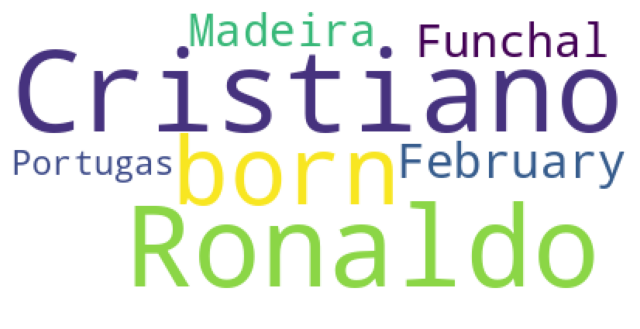

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

text = "Cristiano Ronaldo was born on February 5, 1985, in Funchal, Madeira, Portugas."
wordcloud = WordCloud(background_color = "white").generate(text)

#Plot the wordcloud
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)

#To remove the axis value
plt.axis("off")
plt.show()

Visualisasi wordcloud dapat digunakan untuk mengetahui kata apa yang menjadi topik utama dan sering muncul pada kalimat yang digambarkan dengan ukuran katanya yang lebih besar. Wordcloud dapat dilakukan dengan menggunakan library WordCloud dan divisualisasikan dengan matplotlib. Pada visualisasi di atas, terlihat bahwa Cristiano Ronaldo dan born memiliki ukuran yang paling besar diantara yang lain, hal ini dikarenakan fungsi WordCloud.generate(text) telah berhasil mendeteksi bahwa topik utama dalam kalimat yang divisualisasikan adalah kelahiran Cristiano Ronaldo.

## **d. Clustering**

In [ ]:
import pickle
import re
import os
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

src_name = "/content/20newsgroup.pckl"
src_path = os.path.join("data", src_name)
with open(src_path, 'rb') as fin:
  data = pickle.load(fin)

docs = [doc for doc in data.data]
label = data.target

def preprocess(doc):
  sents = word_tokenize(doc)
  sents_tok = list() #tokenisasi kalimat
  sents = [t for t in sents if t not in stop_words]
  for s in sents:
    s = s.strip().lower() #case folding dan menghilangkan new line
    s = s.replace("\n", " ") #menggantikan \n dengan spasi
    s = re.sub(r'[^a-zA-Z0-9 ]', ' ', s) #menghapus simbol
    s = re.sub(' +', ' ', s) #menghapus repetitive space
    sents_tok.append(s)
  return " ".join(sents_tok)

docs_clear = list()
for d in docs:
  docs_clear.append(preprocess(d))

print('DONE!!!')

DONE!!!


Sebelum dilakukan clustering pada data teks, terlebih dahulu harus dilakukan preprocessing pada data agar data siap diolah dan mampu memberikan insight sesuai dengan yang diinginkan. Preprocessing dilakukan dengan case folding (menyeragamkan seluruh teks agar lower) dan menghilangkan baris baru, mengganti \n (enter) mdengan spasi, menghapus simbol, dan menghapus spasi yang double.

In [ ]:
#Representasi vektor dengan VSM-TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import cluster

tfidf_vectorizer = TfidfVectorizer(max_df = 0.95, min_df = 2)
X = tfidf_vectorizer.fit_transform(docs_clear)
print(X.shape)
k = 3
seed = 99 #Sembarang nilai untuk Random generator
km = cluster.KMeans(n_clusters = k, init = 'random', max_iter = 300, random_state = seed)
km.fit(X)

#Hasil Clustering
C_km = km.predict(X)
C_km[:10]

(1653, 10697)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

Selanjutnya dilakukan clustering dengan algoritma KMeans. Namun terlebih dahulu data teks diubah ke dalam bentuk TF-IDF agar dapat dibentuk clusternya. Dalam hal ini clustering dengan KMeans data dibentuk ke dalam 3 klaster. Selain itu, terlihat dari hasil array bahwa 10 data pertama dalam sampel dikelompokkan ke dalam cluster dengan label 2.

### **ii. Kmeans++**

In [ ]:
kmPP = cluster.KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, tol = 0.0001, random_state = seed)
kmPP.fit(X)
C_kmpp = kmPP.predict(X)
C_kmpp[:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

Clustering selanjutnya dilakukan dengan algoritma Kmeans++ dimana perbedaan dengan KMeans sebelumnya terletak pada init (inisialisasi awal), jika pada KMeans biasa init nya adalah random, maka pada KMeans++ init berupa k-means++. Untuk hasil array sama dengan KMeans yaitu terdapat 10 data pertama yang dikelompokkan ke dalam cluster dengan label 2.

### **iii. DB Scan**

In [ ]:
import numpy as np

dbscan = cluster.DBSCAN(eps = 0.5)
dbscan.fit(X)
C_db = dbscan.labels_.astype(int)
C_db[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

Clustering dengan DBSCAN dapat dilakukan dengan fungsi cluster.DBSCAN(eps). Dengan nilai eps 0.5 terlihat bahwa sebagian besar data (10 data pertama) memiliki label cluster -1, dimana label ini biasanya digunakan untuk menunjukkan data yang dianggap sebagai noise atau data yang tidak dapat ditempatkan dalam cluster tertentu. Ini berarti bahwa DBSCAN tidak dapat menemukan cluster yang signifikan dalam data.

### **iv. Evaluasi Clustering**

#### **Silhouette coefficient (Internal)**

In [ ]:
from sklearn.metrics import silhouette_score as siluet
C = [C_km, C_kmpp, C_db]

for res in C:
  print(siluet(X, res), end = ', ')

#NOTE : Silhouette coefficient hanya cocok untuk k-means

0.018584898347335423, 0.018584898347335423, -0.2369779925148569, 

Evaluasi clustering internal dengan menggunakan Silhouette score dilakukan dengan menunjukkan skor yang berkisar antara -1 hingga 1, dengan nilai positif menunjukkan bahwa data dalam cluster yang sama berada lebih dekat satu sama lain daripada dengan cluster lain, dan nilai negatif menunjukkan sebaliknya. Jika dilihat pada output, skor untuk KMeans dan KMeans++ sama yaitu 0.0186. Hal ini berarti bahwa clustering K-Means tidak menghasilkan pengelompokan yang sangat baik karena skor yang mendekati nol menunjukkan bahwa ada tumpang tindih yang signifikan antara cluster-cluster yang ada. Sedangkan DBSCAN memiliki skor Silhouette sekitar -0.237 yang menunjukkan bahwa clustering memiliki masalah yang lebih serius dalam hal kualitas. Skor negatif mengindikasikan bahwa banyak data dalam cluster yang mungkin tidak seharusnya berada dalam cluster yang sama dan dapat bersinggungan dengan cluster lain.

#### **Purity (Eksternal**

In [ ]:
from sklearn.metrics.cluster import homogeneity_score as purity

for res in C:
  print(purity(label, res), end = ', ')

0.06952188099464576, 0.06952188099464576, 0.0015549989772357536, 

Skor purity digunakan untuk mengukur sejauh mana semua anggota dalam satu cluster memiliki label yang sama. Semakin tinggi skor homogeneity, semakin homogen cluster-cluster tersebut dalam hal label. Berdasarkan output, terlihat bahwa K-Means dan K-Means++ memiliki skor purity yang sama dan cukup tinggi, yaitu 0.0695. Hal ini menunjukkan bahwa pengelompokan yang dihasilkan oleh K-Means cukup homogen dalam hal label, yang berarti bahwa sebagian besar data dalam satu cluster memiliki label yang sama atau mirip. Sedangkan pada DBSCAN, skor purity yang dihasilkan jauh lebih rendah, yaitu 0.0016. Hal ini tentunya menunjukkan bahwa pengelompokan memiliki ketidakhomogenan yang signifikan dalam hal label. Dalam hal ini, banyak data dalam cluster yang memiliki label yang berbeda atau tumpang tindih dengan cluster lain.

#### **NMI**

In [ ]:
from sklearn.metrics import normalized_mutual_info_score as NMI

for res in C:
  print(NMI(label, res), end = ", ")

0.10920145484701148, 0.10920145484701148, 0.002704356633566744, 

NMI digunakan untuk mengukur sejauh mana informasi tentang kelompok yang sebenarnya (ground truth) dapat ditemukan dalam pengelompokan yang dihasilkan oleh algoritma clustering. Nilai NMI berkisar dari 0 hingga 1, dengan nilai yang lebih tinggi menunjukkan kemiripan yang lebih tinggi antara pengelompokan yang dihasilkan dan pengelompokan yang sebenarnya. Terlihat pada output bahwa nilai NMI dari cluster yang dihasilkan oleh KMeans dan KMeans++ sama dan cukup tinggi yaitu 0.109, hal ini berarti bahwa cluster yang dihasilkan oleh KMeans dan KMeans++ memiliki kemiripan yang lebih tinggi dengan pengelompokan yang sebenarnya (ground truth). Sedangkan nilai NMI dari DBSCAN jauh lebih rendah yaitu 0.0027, sehingga hal ini berarti cluster yang dihasilkan oleh DBSCAN memiliki kemiripan yang lebih rendah dengan pengelompokan yang sebenarnya (ground truth).

# **2. Jelaskan perbedaan hasil dari Preprocessing menggunakan NLTK, TextBlob dan Sastrawi dan berikan contohnya**

## **a. Hasil Tokenisasi**

In [ ]:
testoken = "Hello, Donny is my boyfriend. He is so kind, and I am very happy. How about you?"
testokenindo = "Halo, bagaimana kabarmu hari ini, apakah cukup menyenangkan?"

#NLTK
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltktok = word_tokenize(testoken)
#TextBlob
from textblob import TextBlob
textblobtok = TextBlob(testoken).words
#Sastrawi
import re
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
import pandas as pd
a = stopwords.words('indonesian')
def prepro(doc):
  sents = word_tokenize(doc)
  tokens = list()
  sent = [x for x in sents if x not in a]
  for s in sents:
    s = s.strip().lower()
    s = s.replace("\n", " ")
    s = re.sub(r'[^a-zA-Z0-9]',' ', s)
    s = re.sub(' +', ' ', s)
    tokens.append(s)

  return (tokens)

print("NLTK :", nltktok)
print("TextBlob :", textblobtok)
print("Sastrawi :", prepro(testokenindo))

NLTK : ['Hello', ',', 'Donny', 'is', 'my', 'boyfriend', '.', 'He', 'is', 'so', 'kind', ',', 'and', 'I', 'am', 'very', 'happy', '.', 'How', 'about', 'you', '?']
TextBlob : ['Hello', 'Donny', 'is', 'my', 'boyfriend', 'He', 'is', 'so', 'kind', 'and', 'I', 'am', 'very', 'happy', 'How', 'about', 'you']
Sastrawi : ['halo', ' ', 'bagaimana', 'kabarmu', 'hari', 'ini', ' ', 'apakah', 'cukup', 'menyenangkan', ' ']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Berdasarkan output di atas, terlihat bahwa dari ketiga library terdapat perbedaan pada hasil tokenisasi. Jika pada nltk, tanda baca dianggap sebagai token dan tidak dihapus. Sedangkan pada TextBlob, tanda baca dianggap sebagai elemen yang tidak penting sehingga dihapus dari hasil tokenisasi. Kemudian pada Sastrawi, dikarenakan tokenisasi dilakukan secara manual, maka tanda baca tidak dihapus akan tetapi diganti dengan spasi dan dianggap sebagai token sama dengan nltk.

## **b. Hasil Stemming**

In [ ]:
tesstem = "unexpectable"
tesstemindo = "Aku biasanya mempelajari bahasa Indonesia karena aku sangat menyukainya"

#NLTK
from nltk.stem.porter import PorterStemmer
porterstem = PorterStemmer()
nltkstem = [porterstem.stem(word) for word in tesstem.split()]
#TextBlob
from textblob import Word
textblobstem = Word(tesstem).stem()
#Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()
sastrawistem = stemmer.stem(tesstemindo)

print("Word :", tesstem)
print("NLTK :", nltkstem)
print("TextBlob :", textblobstem)
print("Kalimat :", tesstemindo)
print("Sastrawi :", prepro(sastrawistem))

Word : unexpectable
NLTK : ['unexpect']
TextBlob : unexpect
Kalimat : Aku biasanya mempelajari bahasa Indonesia karena aku sangat menyukainya
Sastrawi : ['aku', 'biasa', 'ajar', 'bahasa', 'indonesia', 'karena', 'aku', 'sangat', 'suka']


Berdasarkan output, terlihat bahwa hasil stemming dalam bahasa Inggris yang dihasilkan dengan menggunakan library NLTK sama dengan output dari TextBlob. Unexpectable berubah menjadi unexpect. Akan tetapi, tidak menutup kemungkinan jika hasil stemmingnya dapat berbeda. Kemudian jika dalam bahasa Indonesia, terlihat bahwa library Sastrawi tidak hanya melakukan stemming, tetapi juga lemmatizing. Hal tersebut dapat dilihat pada kata menyukainya yang berubah menjadi suka yang mana kembali ke kata dasar.

## **c. Hasil Lemmatizing**

In [ ]:
teslemma = "crying"
teslemmaindo = "Aku biasanya mempelajari bahasa Indonesia karena aku sangat menyukainya"

#NLTK
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltklemma = lemmatizer.lemmatize(teslemma)
#TextBlob
from textblob import Word
textbloblemma = Word(teslemma).lemmatize('v')
#Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
lemma = StemmerFactory().create_stemmer()
sastrawilemma = lemma.stem(teslemmaindo)

print("Word :", teslemma)
print("NLTK :", nltklemma)
print("TextBlob :", textbloblemma)
print("Kalimat :", teslemmaindo)
print("Sastrawi :", prepro(sastrawilemma))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Word : crying
NLTK : cry
TextBlob : cry
Kalimat : Aku biasanya mempelajari bahasa Indonesia karena aku sangat menyukainya
Sastrawi : ['aku', 'biasa', 'ajar', 'bahasa', 'indonesia', 'karena', 'aku', 'sangat', 'suka']


Berdasarkan output dari masing-masing library, terlihat bahwa hasil dari lemmatizing menggunakan NLTK dan TextBlob menampilkan hasil yang sama. Kata crying kembali ke bentuk dasarnya yaitu cry. Kemudian pada library Sastrawi, sebenarnya tidak ada fungsi lemmatizer, namun setelah dilihat kembali ternyata fungsi stemmer pada library Sastrawi juga dapat menjadi lemmatizer karena mampu mengembalikan kata ke bentuk dasarnya.

## **d. Hasil Pos Tags**

In [ ]:
tesPOS = "Presumably I would like to multiply my provision, saying that without crying"
tesPOSindo = "Aku biasanya mempelajari bahasa Indonesia karena aku sangat menyukainya"
print("Sentence :", tesPOS)

#NLTK POS Tags
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
tokens = word_tokenize(tesPOS)
print("NLTK :", pos_tag(tokens))

#TextBlob POS Tags
from textblob import TextBlob
print("TextBlob :")
for word, pos in TextBlob(tesPOS).tags:
  print(word, pos, end=', ')

Sentence : Presumably I would like to multiply my provision, saying that without crying
NLTK : [('Presumably', 'RB'), ('I', 'PRP'), ('would', 'MD'), ('like', 'VB'), ('to', 'TO'), ('multiply', 'VB'), ('my', 'PRP$'), ('provision', 'NN'), (',', ','), ('saying', 'VBG'), ('that', 'IN'), ('without', 'IN'), ('crying', 'VBG')]
TextBlob :
Presumably RB, I PRP, would MD, like VB, to TO, multiply VB, my PRP$, provision NN, saying VBG, that IN, without IN, crying VBG, 

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Berdasarkan output dari library NLTK dan TextBlob, terlihat bahwa POS Tags dari masing-masing kata pada kalimat memiliki hasil yang sama. Akan tetapi pada library NLTK dikarenakan sebelumnya dilakukan tokenisasi terlebih dahulu, sehingga tanda bacanya juga ikut muncul sebagai token dengan POS Tags yang sama dengan tanda baca tersebut. Seperti contoh di atas terlihat bahwa tanda koma (,) memiliki POS Tags yang sama yaitu koma (,) juga. Sedangkan untuk Sastrawi sendiri, masih belum ada library untuk menampilkan POS Tags pada python.

# **3. Crawling dataset dengan total 10 pada berbagai portal berita Nasional dengan kategori bebas namun wajib sama**

Dalam praktikum ini, saya melakukan copy paste dari 5 website sumber berita dengan masing-masing 2 artikel. Artikel yang digunakan adalah mengenai kesehatan yaitu virus nipah. Berikut adalah langkah membaca artikel yang telah disatukan dalam satu file berekstensi .xlsx.

In [ ]:
import pandas as pd
data = pd.read_excel("textdatasetm4.xlsx", header = None)
data.columns = ["judul", "isi"]
data

,judul,isi
0,Waspada Virus Nipah Sebabkan Kematian di India...,Infeksi virus Nipah menyebabkan dua pasien men...
1,Cari Tahu Penyebab Virus Nipah Muncul Berulang...,Menteri Utama Kerala Pinarayi Vijayan mengatak...
2,"Virus Nipah Mewabah di India, Kenali Gejala da...",Virus nipah telah merenggut nyawa dua warga ne...
3,"Virus Nipah Menyebar di India, Akankah sampai ...","Kerala, negara bagian di India selatan tengah ..."
4,Yang Perlu Anda Ketahui tentang Wabah Virus Ni...,Virus Nipah yang mematikan kembali meruyak di ...
5,Mungkinkah RI Diam-diam Pernah Kemasukan Virus...,"India kembali 'diamuk' wabah virus Nipah, dua ..."
6,"Potensi Penyebaran Virus Nipah di Indonesia, T...","Per 14 September 2023, negara bagian Kerala di..."
7,Gejala Virus Nipah dan Cara Mencegah Penularannya,Virus Nipah diketahui tengah menyebar di Keral...
8,"Virus Nipah Menyebar, Negara Bagian di India T...",Negara Bagian Kerala di selatan India meliburk...
9,"Mewaspadai Nipah, Virus Langka Mematikan yang ...",Ada suatu wabah virus baru yang muncul di Indi...


Data berita yang telah disatukan dalam file excel dipanggil dengan fungsi pandas dan menampilkannya berdasarkan kolom judul dan isi berita.

In [ ]:
databerita = []
for i in range(0, len(data)):
  mergedata = data["judul"][i] + " " + data["isi"][i]
  databerita.append(mergedata)

databerita

['Waspada Virus Nipah Sebabkan Kematian di India, Antisipasi Indonesia? Infeksi virus Nipah menyebabkan dua pasien meninggal dunia di Kerala, India seperti disampaikan pemerintah setempat pada Rabu pekan lalu. Virus ini termasuk langka namun menyebabkan infeksi serius. Sebagai kebijakan menghadapi infeksi virus Nipah, sejumlah sekolah dan perkantoran di Kerala pun ditutup. Tak hanya itu, ratusan warga ikut dites. Langkah ini dilakukan guna mengetahui penyebaran penyakit tersebut. Dari 700 orang yang menjalani tes, 153 di antaranya merupakan pekerja kesehatan. "Kami fokus melakukan pelacakan pada orang yang melakukan kontak dan terinfeksi. Serta melakukan isolasi pada siapapun," kata Menteri Kesehatan bagian Kerala, Veena George. Menteri Utama Kerala Pinarayi Vijayan menyatakan, pemerintah menyediakan fasilitas isolasi bagi masyarakat terkait penanganan infeksi virus Nipah India. Mengutip laman Hindustan Times, kali ini merupakan outbreak keempat virus Nipah di Kerala sejak 2018. Dari o

Selanjutnya data berita tersebut di merge ke dalam satu variabel bertype list dan terdiri dari 10 artikel.

# **4. Lakukan preprocessing yang sudah diajarkan pada modul ini (menggunakan salah satu library saja)**

In [ ]:
!pip install Sastrawi

Dikarenakan data berita yang digunakan berbahasa Indonesia, maka perlu dilakukan install library Sastrawi untuk analisis data.

In [ ]:
import re
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
import pandas as pd

a = stopwords.words('indonesian')

def prepro(doc):
  sents = word_tokenize(doc)
  tokens = list()
  sent = [x for x in sents if x not in a]
  for s in sents:
    s = s.strip().lower()
    s = s.replace("\n", " ")
    s = re.sub(r'[^a-zA-Z0-9]',' ', s)
    s = re.sub(' +', ' ', s)
    tokens.append(s)

  return " ".join(tokens)

doneprepro = list()
for i in databerita:
  doneprepro.append(prepro(i))

doneprepro

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['waspada virus nipah sebabkan kematian di india   antisipasi indonesia   infeksi virus nipah menyebabkan dua pasien meninggal dunia di kerala   india seperti disampaikan pemerintah setempat pada rabu pekan lalu   virus ini termasuk langka namun menyebabkan infeksi serius   sebagai kebijakan menghadapi infeksi virus nipah   sejumlah sekolah dan perkantoran di kerala pun ditutup   tak hanya itu   ratusan warga ikut dites   langkah ini dilakukan guna mengetahui penyebaran penyakit tersebut   dari 700 orang yang menjalani tes   153 di antaranya merupakan pekerja kesehatan     kami fokus melakukan pelacakan pada orang yang melakukan kontak dan terinfeksi   serta melakukan isolasi pada siapapun     kata menteri kesehatan bagian kerala   veena george   menteri utama kerala pinarayi vijayan menyatakan   pemerintah menyediakan fasilitas isolasi bagi masyarakat terkait penanganan infeksi virus nipah india   mengutip laman hindustan times   kali ini merupakan outbreak keempat virus nipah di kera

Setelah data berita telah disatukan, maka dilakukan preprocessing pada data dengan melakukan case folding dengan menyeragamkan seluruh teks agar lower dan menghilangkan baris baru, mengganti \n (enter) dengan spasi, menghapus simbol, dan menghapus spasi yang double, melakukan tokenisasi dengan fungsi word_tokenize dari library nltk, serta melakukan stopwords untuk menghilangkan kata penghubung yang tidak memiliki arti penting.

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
hasilstopword = stopword.remove(" ".join(doneprepro))
hasilstopword

'waspada virus nipah sebabkan kematian india   antisipasi indonesia   infeksi virus nipah menyebabkan pasien meninggal dunia kerala   india disampaikan pemerintah setempat rabu pekan lalu   virus termasuk langka menyebabkan infeksi serius   kebijakan menghadapi infeksi virus nipah   sejumlah sekolah perkantoran kerala ditutup   tak   ratusan warga ikut dites   langkah dilakukan mengetahui penyebaran penyakit tersebut   700 orang menjalani tes   153 antaranya merupakan pekerja kesehatan     fokus melakukan pelacakan orang melakukan kontak terinfeksi   melakukan isolasi siapapun     kata menteri kesehatan bagian kerala   veena george   menteri utama kerala pinarayi vijayan menyatakan   pemerintah menyediakan fasilitas isolasi masyarakat terkait penanganan infeksi virus nipah india   mengutip laman hindustan times   kali merupakan outbreak keempat virus nipah kerala sejak 2018   orang dites   total enam kasus dilaporkan per tahun membuat pemerintah bersiaga pandemi covid 19   pasien menin

Selanjutnya dikarenakan masih terdapat cukup banyak kata penghubung, maka dilakukan stopwords remove kembali dengan library Sastrawi menggunakan fungsi StopWordRemoveFactory. Dikarenakan fungsi ini hanya menerima data dalam bentuk kalimat bukan token, maka dilakukan join pada data hasil preprocessing agar dapat diolah di stopwords.

In [ ]:
import Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()
hasilstem = stemmer.stem(hasilstopword)
hasilstemlist = hasilstem.split()
hasilstemlist

['waspada',
 'virus',
 'nipah',
 'sebab',
 'mati',
 'india',
 'antisipasi',
 'indonesia',
 'infeksi',
 'virus',
 'nipah',
 'sebab',
 'pasien',
 'tinggal',
 'dunia',
 'kerala',
 'india',
 'sampai',
 'perintah',
 'tempat',
 'rabu',
 'pekan',
 'lalu',
 'virus',
 'masuk',
 'langka',
 'sebab',
 'infeksi',
 'serius',
 'bijak',
 'hadap',
 'infeksi',
 'virus',
 'nipah',
 'jumlah',
 'sekolah',
 'kantor',
 'kerala',
 'tutup',
 'tak',
 'ratus',
 'warga',
 'ikut',
 'tes',
 'langkah',
 'laku',
 'tahu',
 'sebar',
 'sakit',
 'sebut',
 '700',
 'orang',
 'jalan',
 'tes',
 '153',
 'antara',
 'rupa',
 'kerja',
 'sehat',
 'fokus',
 'laku',
 'lacak',
 'orang',
 'laku',
 'kontak',
 'infeksi',
 'laku',
 'isolasi',
 'siapa',
 'kata',
 'menteri',
 'sehat',
 'bagi',
 'kerala',
 'veena',
 'george',
 'menteri',
 'utama',
 'kerala',
 'pinarayi',
 'vijayan',
 'nyata',
 'perintah',
 'sedia',
 'fasilitas',
 'isolasi',
 'masyarakat',
 'kait',
 'tangan',
 'infeksi',
 'virus',
 'nipah',
 'india',
 'kutip',
 'laman',
 'h

Terakhir melakukan stemming pada data berita dengan fungsi StemmerFactory pada library Sastrawi. Hasil stopword yang sebelumnya dalam bentuk kalimat dilakukan stemming agar kata di dalamnya kembali ke bentuk dasar. Kemudian hasil stemming ini di split berdasarkan spasi agar dapat diubah menjadi TF-IDF dan dicari most common word nya.

# **5. Buatlah wordcloud dan most common word barplot, interpretasikan hasilnya**

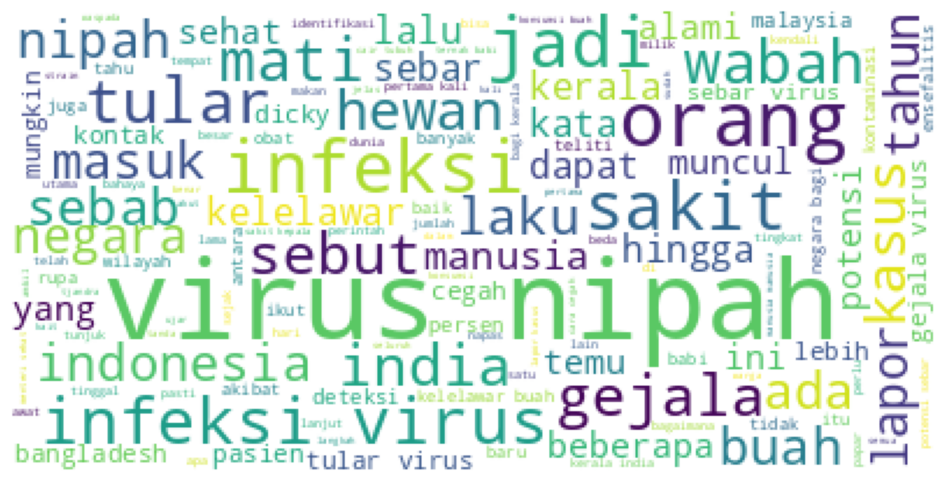

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = "white").generate(hasilstem)

#Plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

#To remove the axis value
plt.axis("off")
plt.show()

Langkah selanjutnya adalah membuat visualisasi wordcloud dengan fungsi WordCloud pada library wordcloud dan juga library matplotlib. Data yang divisualisasikan dalam wordcloud ini adalah hasil stemming dalam bentuk kalimat. Terlihat pada visualisasi bahwa topik yang ukurannya paling besar adalah virus nipah, hal ini disebabkan karena frekuensi kemunculan kata tersebut cukup sering dan memang topik utama dalam seluruh artikel berita membahas mengenai virus nipah. Kemudian disusul dengan kata orang, infeksi, sakit.

In [ ]:
freq = {}
for token in hasilstemlist:
  if token in freq:
    freq[token] += 1
  else:
    freq[token] = 1

for token, count in freq.items():
  print(f"{token}: {count}")

waspada: 17
virus: 256
nipah: 194
sebab: 25
mati: 40
india: 44
antisipasi: 3
indonesia: 30
infeksi: 102
pasien: 18
tinggal: 14
dunia: 9
kerala: 38
sampai: 3
perintah: 9
tempat: 9
rabu: 1
pekan: 1
lalu: 22
masuk: 33
langka: 3
serius: 3
bijak: 1
hadap: 2
jumlah: 8
sekolah: 6
kantor: 6
tutup: 5
tak: 3
ratus: 3
warga: 7
ikut: 11
tes: 5
langkah: 7
laku: 25
tahu: 12
sebar: 46
sakit: 63
sebut: 37
700: 3
orang: 67
jalan: 2
153: 1
antara: 12
rupa: 11
kerja: 1
sehat: 30
fokus: 3
lacak: 2
kontak: 28
isolasi: 6
siapa: 1
kata: 21
menteri: 10
bagi: 19
veena: 2
george: 2
utama: 9
pinarayi: 2
vijayan: 6
nyata: 4
sedia: 1
fasilitas: 4
masyarakat: 3
kait: 7
tangan: 8
kutip: 7
laman: 3
hindustan: 2
times: 2
kali: 18
outbreak: 4
empat: 5
sejak: 8
2018: 10
total: 2
enam: 2
kasus: 44
lapor: 30
per: 3
tahun: 23
buat: 6
siaga: 1
pandemi: 12
covid: 4
19: 7
aktif: 2
turun: 3
jadi: 59
4: 8
ambil: 7
sampel: 1
61: 1
risiko: 11
tinggi: 9
dalam: 7
awat: 9
hasil: 1
tunjuk: 8
negatif: 1
lepas: 1
tindak: 5
batas: 4
ket

Kemudian dilakukan perhitungan frekuensi untuk masing-masing kata yang muncul pada artikel berita, frekuensi ini digunakan untuk membentuk sebuah barplot kemunculan kata.

<Axes: xlabel='Key'>

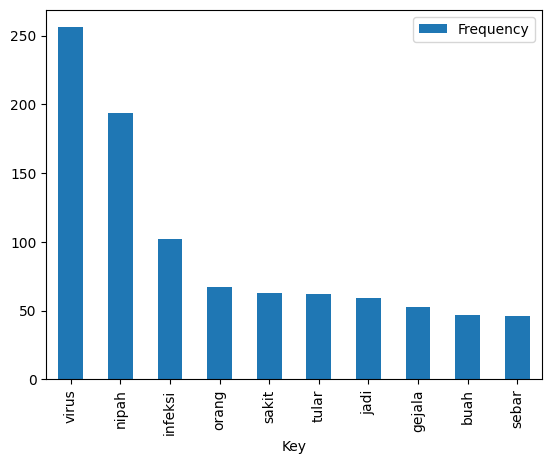

In [ ]:
from collections import Counter
counter = Counter(freq)
commonfreq = counter.most_common(10)
commonfreq = dict(commonfreq)
commonfreq

import pandas as pd
df_freq_tokens = pd.DataFrame.from_dict(commonfreq, orient = 'index')
df_freq_tokens.columns = ['Frequency']
df_freq_tokens.index.name = 'Key'
df_freq_tokens.plot(kind = 'bar')

Selanjutnya dilakukan visualisasi barplot untuk mengetahui 10 kata dengan frekuensi kemunculan paling banyak (most common) pada artikel berita. Barplot ini dibentuk dengan menggunakan hasil perhitungan frekuensi sebelumnya. Pada output terlihat bahwa kata virus menempati urutan tertinggi sebagai kata yang paling sering muncul dengan frekuensi terbanyak yaitu mencapai 250 kali. Kemudian disusul dengan kata nipah sebagai nama dari virus yang menjadi topik dalam berita yang frekuensinya hampir mencapai 200 kali, dan kata infeksi yang mencapai 100 kali.

# **6. Lakukan clustering dengan menggunakan fitur TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Menghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, min_df = 2)
tfidf_matrix = tfidf_vectorizer.fit_transform(hasilstemlist)

Agar data berita dapat di cluster, maka harus diubah ke dalam TF-IDF dengan menggunakan fungsi TfidfVectorizer. Selanjutnya bentuk matriks dari TF-IDF (yang telah ditransform) digunakan untuk membentuk cluster.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


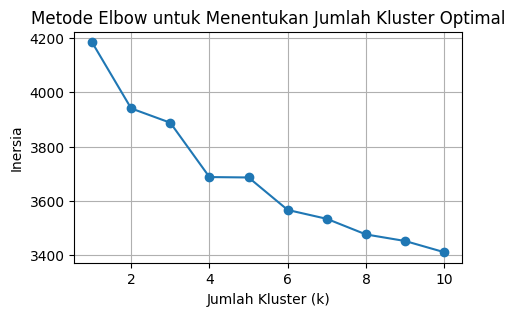

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
#Inisialisasi daftar untuk menyimpan inersia dan jumlah kluster (y)
inertia = []
num_clusters = []

#Menghitung inersia untuk nilai k dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)
    num_clusters.append(k)  # Menambahkan jumlah kluster ke dalam daftar

#Membuat plot metode elbow
plt.figure(figsize=(5, 3))
plt.plot(num_clusters, inertia, marker='o')
plt.xlabel('Jumlah Kluster (k)')
plt.ylabel('Inersia')
plt.title('Metode Elbow untuk Menentukan Jumlah Kluster Optimal')
plt.grid(True)
plt.show()

Sebelum di cluster, terlebih dahulu ditentukan jumlah cluster yang diinginkan. Dalam hal ini digunakan grafik Elbow Method untuk menemukan jumlah cluster optimal yang dapat dibentuk dengan algoritma KMeans. Terlihat pada grafik bahwa perpotongan grafik yang sangat curam terletak pada angka 4, sehingga dapat ditentukan bahwa jumlah cluster optimal yang dapat dibentuk adalah 4.

In [ ]:
#Melakukan clustering dengan K-Means
nclusters = 4
kmeans = KMeans(n_clusters = nclusters, random_state = 0)
kmeans.fit(tfidf_matrix)

#Menambahkan label cluster ke setiap dokumen
labels = kmeans.labels_

#Menampilkan hasil clustering
for i in range(nclusters):
    print(f"Cluster {i + 1}:")
    cluster_docs = [hasilstemlist[j] for j in range(len(hasilstemlist)) if labels[j] == i]
    print("\n".join(cluster_docs[:5]))  #Menampilkan 5 dokumen pertama dalam setiap cluster
    print("\n=============================\n")

Cluster 1:
virus
virus
virus
virus
virus


Cluster 2:
negara
negara
negara
negara
negara


Cluster 3:
waspada
nipah
sebab
mati
india


Cluster 4:
sakit
sakit
sakit
sakit
sakit




Setelah diketahui jumlah cluster optimal, maka langkah selanjutnya adalah membentuk cluster dengan menggunakan algoritma KMeans dan jumlah cluster sebanyak 4. Berdasarkan output terlihat bahwa pada Cluster 1, 5 kata pertamanya adalah virus. Kemudian pada Cluster 2, 5 kata pertamanya adalah negara. Selanjutnya Cluster 3 berisi 5 kata beragam yaitu waspada, nipah, sebab, mati, dan india. Terakhir Culster 4 berisi 5 kata pertama berupa sakit.

# **7. Buat visualisasi clusternya dan lakukan interpretasi terhadap hasil tersebut**

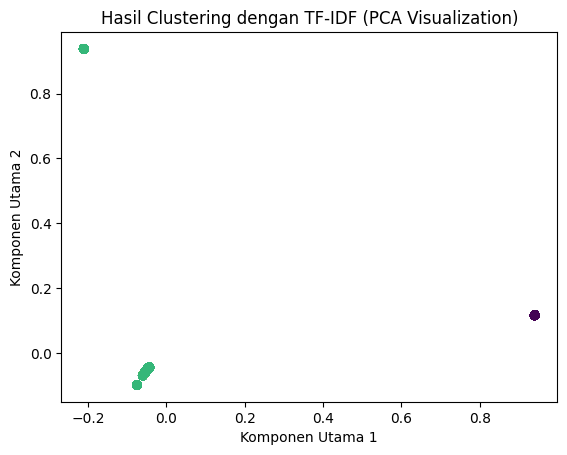

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

#Membuat plot hasil clustering
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis')
plt.title('Hasil Clustering dengan TF-IDF (PCA Visualization)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.show()

Selanjutnya memvisualisasikan hasil cluster dengan menggunakan library matplotlib.pyplot. Sebelum di visualisasikan, dilakukan reduksi dimensi menjadi 2 komponen dengan PCA agar data berita bisa divisualisasikan dalam grafik 2 dimensi. Setelah berhasil dilakukan reduksi dimensi, selanjutnya yaitu visualisasi dengan scatter plot. Warna dari setiap titik dalam plot ditentukan oleh label-cluster yang dihasilkan sebelumnya (dalam variabel labels), sehingga terlihat bahwa data berkelompok di dalam ruang 2 dimensi.

# **8. Gunakan validasi menggunakan salah satu Davies-Bouldin index atau Silhouette score**

In [ ]:
C = kmeans.predict(tfidf_matrix)
#Evaluasi Internal dengan Silhouette coefficient
from sklearn.metrics import silhouette_score as siluet
print("Skor evaluasi Silhouette :", siluet(tfidf_matrix, C))

Skor evaluasi Silhouette : 0.11360419551885022


Langkah terakhir dalam analisis ini adalah dengan melakukan evaluasi pada hasil clustering. Dilakukan evaluasi internal pada hasil clustering data berita dengan menggunakan Silhouette score. Evaluasi clustering internal menggunakan Silhouette score dilakukan dengan menunjukkan skor yang berkisar antara -1 hingga 1, dengan nilai positif menunjukkan bahwa data dalam cluster yang sama berada lebih dekat satu sama lain daripada dengan cluster lain, dan nilai negatif menunjukkan sebaliknya. Jika dilihat pada output, skor Silhouette bernilai positif yaitu 0.1136. Nilai positif tersebut menunjukkan bahwa setiap titik data dalam cluster cenderung memiliki jarak yang lebih kecil (lebih dekat) dengan anggota lain dalam cluster yang sama dibandingkan dengan jaraknya ke anggota cluster-cluster lainnya. Selain itu dengan skor 0.1136, hasil cluster cenderung baik dalam mempertahankan titik-titik dalam cluster yang sama dan memiliki tingkat ketidakseragaman yang relatif rendah dalam cluster-cluster tersebut, namun cukup buruk dalam pengelompokan karena terdapat 2 cluster yang bertumpuk. Sehingga pada visualisasi sebelumnya terlihat bahwa hanya terdapat 3 cluster karena terdapat 2 cluster yang bertumpuk.